This is necessary on local host to open interactive QT4 UI for signals+waveforms viewers and for having figures directly in the notebook.

In [5]:
%gui qt4
%matplotlib inline

Import necessary modules

In [6]:
import numpy as np
import pandas as pd
from matplotlib import pyplot
import seaborn as sns

from tridesclous import DataIO
import tridesclous as tdc

Download Locust dataset from zenedo.

In [7]:
from urllib.request import urlretrieve
import os
import h5py

name = 'locust20010201.hdf5'
distantfile = 'https://zenodo.org/record/21589/files/'+name
localfile = name
if not os.path.exists(localfile):
    urlretrieve(distantfile, localfile)
hdf = h5py.File(localfile,'r')

#create array from the first trials
ch_names = ['ch09','ch11','ch13','ch16']
array_sigs = np.array([hdf['Continuous_1']['trial_01'][name][...] for name in ch_names]).transpose()
array_sigs = (array_sigs.astype('float32') - 2**15.) / 2**15


# DataIO

Create our data manager and append some data into it.
Note that our data is already filtered.

In [8]:
dataio = DataIO(dirname = 'Dataset tri locust')
dataio.append_signals(array_sigs, seg_num = 0,t_start = 0., sampling_rate =  15000.,
                    already_hp_filtered = True, channels = ch_names)


AssertionError: data already in store for seg_num 0

In [9]:
dataio #equivalent to data.summary(level=0)

DataIO <140643235735648>
Workdir: Dataset tri locust/data.h5
sampling_rate: 15000.0
nb_channel: 4
nb_segments: 1

In [10]:
print(dataio.summary(level=1))

DataIO <140643235735648>
Workdir: Dataset tri locust/data.h5
sampling_rate: 15000.0
nb_channel: 4
nb_segments: 1
Segment 0
    duration : 28.7698s.
    times range : 0.0 - 28.7698



# Signals = pandas.DataFrame
Each segment of data is a pandas.DataFrame and its index is the time coded in second.

So we can acces with times or sample position with DataFrame.loc and dataFrame.iloc.
See http://pandas.pydata.org/pandas-docs/stable/indexing.html

In [11]:
signals = dataio.get_signals(seg_num=0, filtered =True)

chunk = signals.iloc[45225:45450]  #slicing by sample
chunk = signals.loc[3.015:3.030]  #slicing by time

chunk

,b'ch09',b'ch11',b'ch13',b'ch16'
3.015000,-0.936829,-0.934784,-0.938354,-0.936401
3.015067,-0.937103,-0.936798,-0.936371,-0.938049
3.015133,-0.937561,-0.936798,-0.937653,-0.936371
3.015200,-0.942169,-0.936737,-0.939697,-0.936066
3.015267,-0.940399,-0.940491,-0.940277,-0.937897
3.015333,-0.937286,-0.937744,-0.939423,-0.938934
3.015400,-0.932312,-0.935486,-0.939148,-0.936890
3.015467,-0.938660,-0.939087,-0.938477,-0.936584
3.015533,-0.936676,-0.936615,-0.938965,-0.936096
3.015600,-0.937653,-0.938568,-0.938049,-0.936066


Signals is pure pandas.DataFrame so We can user all pandas facilities:

In [12]:
signals.describe()

,b'ch09',b'ch11',b'ch13',b'ch16'
count,431548.000000,431548.000000,431548.000000,431548.000000
mean,-0.937475,-0.937470,-0.937451,-0.937453
std,0.002067,0.001940,0.002199,0.001626
min,-0.970490,-0.958191,-0.965576,-0.946075
25%,-0.938477,-0.938354,-0.938568,-0.938324
50%,-0.937225,-0.937225,-0.937164,-0.937225
75%,-0.936005,-0.936127,-0.935822,-0.936157
max,-0.925446,-0.919006,-0.925201,-0.929810


Plotting is also easy so.

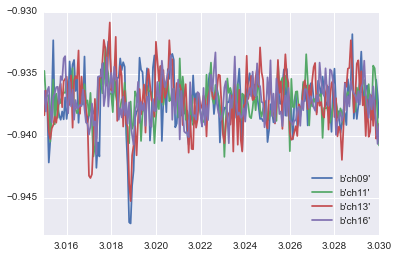

In [13]:
chunk.plot()

tridesclous have some function that directly work on this kind of (signals) DataFrame:
  * normalize_signals
  * derivative_signals
  * rectify_signals


(-20.0, 10.0)

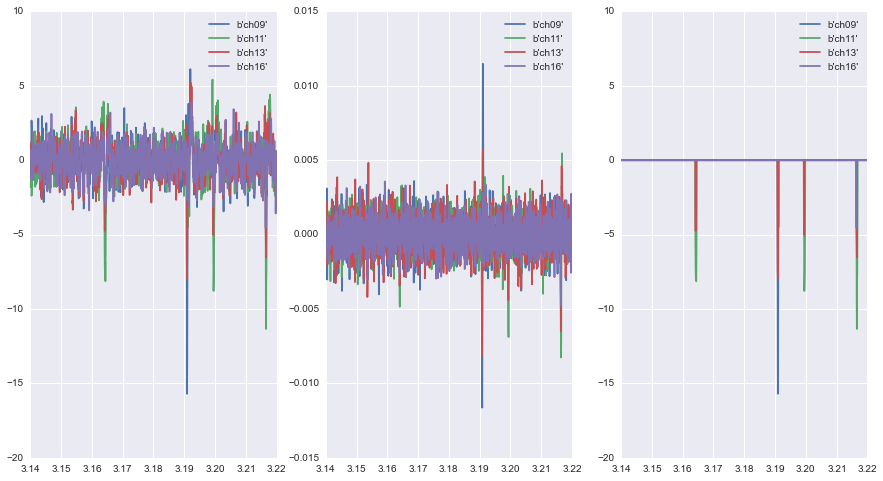

In [14]:
normed_sigs = tdc.normalize_signals(signals)
deriv_sigs = tdc.derivative_signals(signals)
retified_sigs = tdc.rectify_signals(normed_sigs, threshold = -4)

fig, axs = pyplot.subplots(ncols = 3, figsize = (15, 8))
normed_sigs[3.14:3.22].plot(ax = axs[0])
deriv_sigs[3.14:3.22].plot(ax = axs[1])
retified_sigs[3.14:3.22].plot(ax = axs[2])
axs[2].set_ylim(axs[0].get_ylim())


# Peak detection
The class  PeakDetector offers facilities:
  * to detect peaks.

This return peak_pos in index.

Having pek with times is easy : 
peak_time = signals.index[peaks_pos]



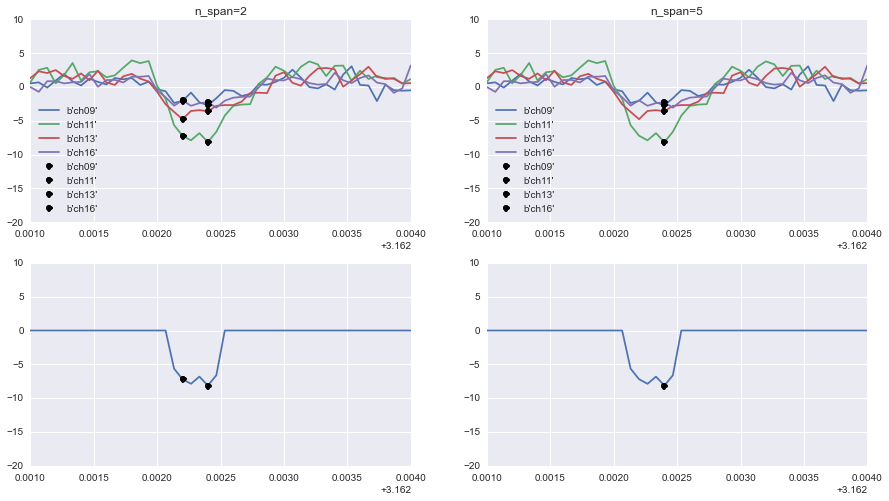

In [15]:
peakdetector = tdc.PeakDetector(signals)
peaks_pos_bad = peakdetector.detect_peaks(threshold=-4, peak_sign = '-', n_span = 2)
peaks_index_bad = signals.index[peaks_pos_bad]

peaks_pos_ok = peakdetector.detect_peaks(threshold=-5, peak_sign = '-', n_span = 5)
peaks_index_ok = signals.index[peaks_pos_ok]

fig, axs = pyplot.subplots(nrows = 2, ncols = 2, figsize = (15, 8))


t1, t2 = 3.163, 3.166
chunk = normed_sigs[t1:t2]
chunk_rectified = peakdetector.rectified_sigs.sum(axis=1)[t1:t2]

#bad
chunk.plot(ax = axs[0,0])
chunk_rectified.plot(ax = axs[1,0])
peaks_value_bad = normed_sigs.loc[peaks_index_bad]
peaks_value_bad[t1:t2].plot(marker = 'o', linestyle = 'None', ax = axs[0,0], color = 'k')
axs[0,0].set_title('n_span=2')
peaks_value_bad = chunk_rectified.loc[peaks_index_bad]
peaks_value_bad[t1:t2].plot(marker = 'o', linestyle = 'None', ax = axs[1,0], color = 'k')



#OK
chunk.plot(ax = axs[0,1])
chunk_rectified.plot(ax = axs[1,1])
peaks_value_ok = normed_sigs.loc[peaks_index_ok]
peaks_value_ok[t1:t2].plot(marker = 'o', linestyle = 'None', ax = axs[0,1], color = 'k')
axs[0,1].set_title('n_span=5')
peaks_value_ok = chunk_rectified.loc[peaks_index_ok]
peaks_value_ok[t1:t2].plot(marker = 'o', linestyle = 'None', ax = axs[1,1], color = 'k')



for ax in axs.flatten():
    ax.set_ylim(-20, 10)

# Extract waveform

The class WaveformExtractor offers facilities to:
    * extreact waveforms
    * extract noise (=fake waveform in between peaks)
    * keep or exclude good events
    * find good limits for the cut.
   
The wavefroms object os also a pandas.DataFrame with:
   * index is peak_pos
   * columns is MultiIndex (channels, samples) where samples is from n_left to n_rigth [-10, -9, ..., 0, 1, ...,  30]. 0 is peak.



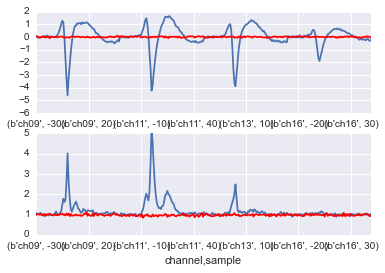

In [16]:
#start with larger sweep
waveformextractor = tdc.WaveformExtractor(peakdetector, n_left=-30, n_right=50)
med, mad = tdc.median_mad(waveformextractor.long_waveforms)
fig, axs = pyplot.subplots(nrows =2)
med.plot(ax = axs[0], ylim = (-6, 2))
mad.plot(ax = axs[1], ylim = (0, 5))

# make some noise to compare
noise = waveformextractor.extract_noise(-30, 50, size=1000, safety_factor=2)
med_noise, mad_noise = tdc.median_mad(noise)
med_noise.plot(ax = axs[0], ylim = (-6, 2), color = 'r')
mad_noise.plot(ax = axs[1], ylim = (0, 5), color = 'r')

-10 27


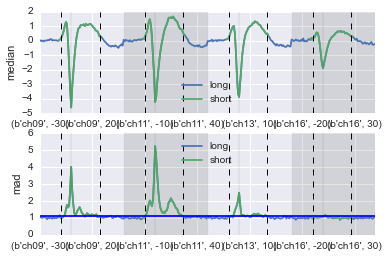

In [19]:
#find the good limits
limit_left, limit_right = waveformextractor.find_good_limits(mad_threshold = 1.1)
print(limit_left, limit_right)
waveformextractor.plot_good_limit()
short_wf = waveformextractor.get_ajusted_waveforms()

# Projection and Clustering

The class Clustering offers facilities to:
  * project waveform with : PCA, ...
  * clusters them with kmeans, EM+GMM


/usr/lib/python3/dist-packages/matplotlib/axes/_axes.py:476: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


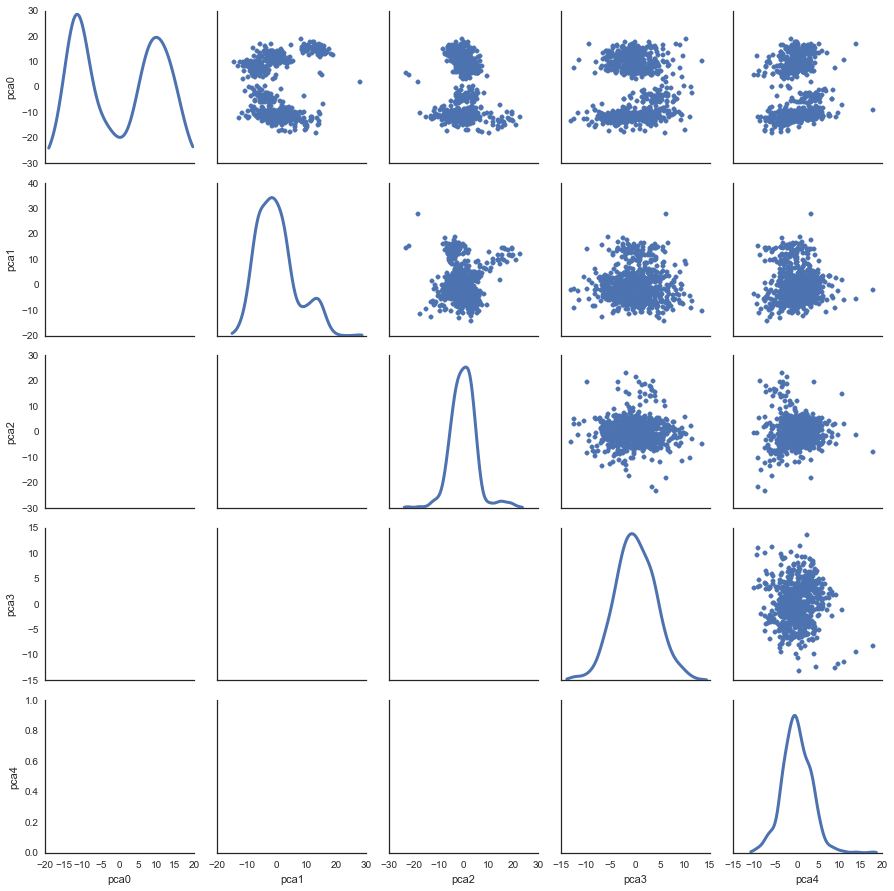

In [21]:
# work on shorted waveforms (see good limits)
clustering = tdc.Clustering(short_wf)

# do a PCA
features = clustering.project(method = 'pca', n_components = 5)
features

clustering.plot_projection(plot_density = False)

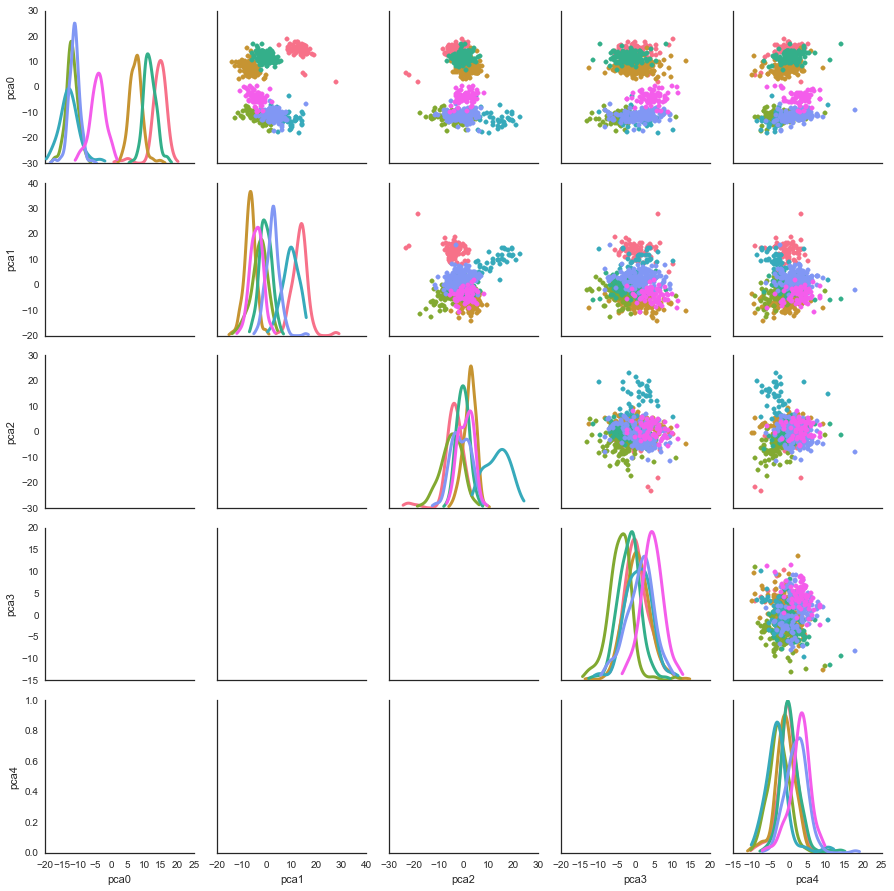

In [22]:
# try to clusters
labels = clustering.find_clusters(7)
df = pd.concat([features, labels], axis=1)

clustering.plot_projection(plot_density = False)

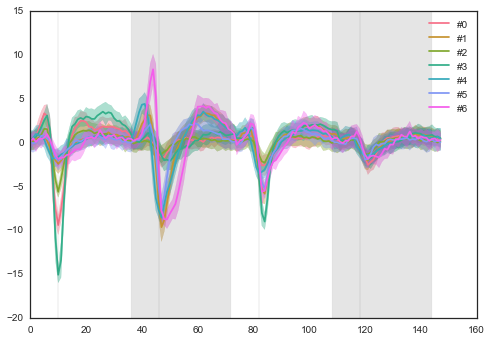

In [23]:
catalogue = clustering.construct_catalogue()
clustering.plot_catalogue()


# Peeler
The class peeler help:
   * estimate jitter
   * predict spiketrain
   * subtract and get reisuals


Apply level= 0

2 -1.19507030423 41
2 -0.0687530224298 42

2 -0.934768386768 998
2 -0.0441888817567 999

2 -1.32951333746 1810
2 -0.400653577735 1811

2 1.02535371674 2012
2 0.182698498779 2011

2 -1.71376386786 2377
2 0.145129899551 2379

3 1.18151062891 2588
3 0.181149979237 2587

2 -0.532760417115 2754
2 0.503955386525 2755

2 0.589928795143 3358
2 -0.50383973891 3357

2 -0.503565433079 3738
2 0.617300017166 3739

2 -0.634916533814 4354
2 0.415430957001 4355

2 1.23174915006 4474
2 0.508294290381 4473

4 -1.0377493444 5917
4 0.0454184674384 5918

2 -0.778267629742 6378
2 0.394597403772 6379

2 -0.998475334106 6683
2 -0.0438198965357 6684

2 1.95714123521 6987
2 -0.395243767812 6985

2 1.02113404439 8828
2 0.167282407776 8827

0 0.802388630503 11306
0 -0.258876084214 11305

2 -0.522479511355 11763
2 0.526189747542 11764

0 0.919932228787 16199
0 -0.269992153328 16198

4 -0.601520933127 16978
4 0.428454538813 16979

0 -0.714882444189 17049
0 0.420497096457 17050

0 1.08536054101 17686

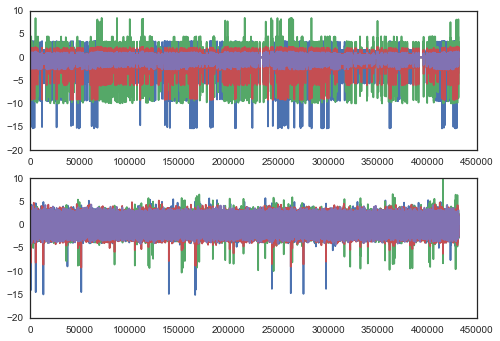

In [24]:
signals = peakdetector.normed_sigs
peeler = tdc.Peeler(signals, catalogue,  limit_left, limit_right,
                        threshold=-4, peak_sign = '-', n_span = 5)

#Peel at level=0
prediction0, residuals0 = peeler.peel()
fig, axs = pyplot.subplots(nrows = 2)
axs[0].plot(prediction0)
axs[1].plot(residuals0)



Apply level= 1

2 0.72689755112 1005
2 -0.135372142241 1004

2 0.943457904867 1727
2 -0.027574584864 1726

2 1.19614173428 2416
2 0.437786480048 2415

2 1.5536211447 17781
2 -0.14927416908 17779

2 -1.47519535482 23672
2 -0.833790749357 23673

2 -1.26500247232 25503
2 0.023901941433 25504

1 -0.514306460428 36343
4 -0.421997619988 36344

2 0.92790965547 53273
2 0.0566187676103 53272

2 -0.719596165195 60054
2 0.257481743807 60055

2 -1.00200120667 67530
2 0.280159151768 67531

2 0.742292535398 72988
5 -0.128939991175 72987

2 -1.85281904022 80808
2 -0.431833785897 80810

2 -0.567478209867 82892
2 0.51365589075 82893

2 -1.4112535353 111959
5 -0.582771479236 111960

2 -1.21215487955 123323
2 0.0105768559393 123324

2 -1.73935864746 142765
2 -0.676325040172 142767

2 0.551460006413 155912
2 -0.516661114551 155911

2 1.52686004724 165549
2 0.148044249629 165547

4 0.710501743517 166830
-1 0.0 166829

6 0.702517439658 167868
-1 0.0 167867

2 0.6808211582 169672
2 -0.530500926684 169671

1 

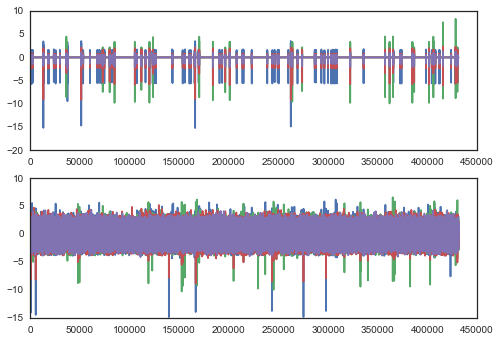

In [25]:
#Peel at level=1
prediction1, residuals1 = peeler.peel()
fig, axs = pyplot.subplots(nrows = 2)
axs[0].plot(prediction1)
axs[1].plot(residuals1)
